In [83]:
from sklearn.datasets.samples_generator import make_blobs
from random import *
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

centers = []
for i in range(5):
    x = randint(-10, 10)
    y = randint(-10, 10)
    z = randint(-10, 10)
    centers.append([x, y, z])

X, y = make_blobs(n_samples=5000, n_features=3, centers=centers, cluster_std=0.8, center_box=(-10, 10.0), shuffle=True, random_state=0)

print(X[:, 0])
print(y)

[-2.92729148  8.34823312 -1.25243343 ... -0.25359577  0.22940649
 -1.39218448]
[4 1 3 ... 0 2 3]


In [35]:
import matplotlib.pyplot as plt

#set colors for the clusters
colors = ['r','g','b','c','k','y','m']
c = []
for i in y:
    c.append(colors[i])
    


/usr/lib/python3/dist-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


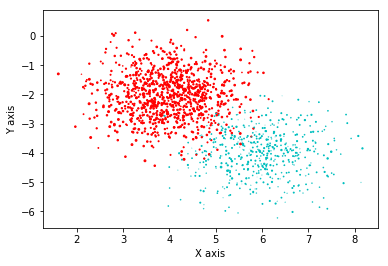

In [36]:
plt.scatter(X[:, 0], X[:, 1], X[:, 2], c= c)
plt.gray()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

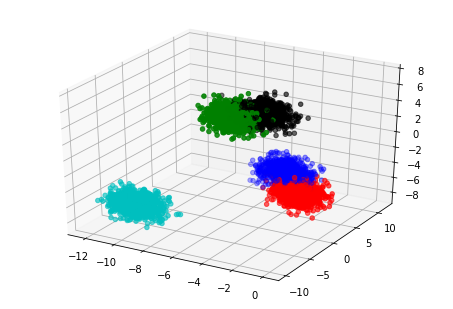

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
import numpy as np

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = c)
pyplot.show()

In [5]:
ward = []
def read_file(file_name):
    array = []
    with open(file_name, 'r') as f:
        content = f.readline()
        print(content)
        for i in range(4):
            content = f.readline()
            content = content.split(' ')
            #print(content[1])
            array.append(float(content[1]))
        for i in range(4):
            content = f.readline()
            content = content.split(' ')
            #print(content[1])
            ward.append(float(content[1]))
    return array
    
result_25_16_5 = './results/result25_16_5.txt'
result_400_16_128 = './results/result400_16_128.txt'

approx_25 = read_file(result_25_16_5)
approx_400 = read_file(result_400_16_128)

epsilon 0.25 16 5

epsilon 0.400 16 128



In [113]:
data = { 'Iris':   [ward[0], approx_25[0], approx_400[0], 0.7543722885433277],
         'Cancer': [ward[1], approx_25[1], approx_400[1], 0.5070787412444986],
         'Digits': [ward[2], approx_25[2], approx_400[2], 0.466434952852736],
         'Boston': [ward[3], approx_25[3], approx_400[3], 0.8007426285774798 ]
       }   

index= ['Ward', 'App-Ward (e = 0.5, T = 16, L = 5)', 'App-Ward (e = 4, T = 16, L = 128)', 'App-Ward (e = 8, T = 2, L = 10)']
df = pd.DataFrame(data, index)    
df.head()




,Iris,Cancer,Digits,Boston
Ward,0.675712,0.457046,0.818005,0.796541
"App-Ward (e = 0.5, T = 16, L = 5)",0.619183,0.535426,0.794620,0.798001
"App-Ward (e = 4, T = 16, L = 128)",0.759643,0.472755,0.564707,0.784764
"App-Ward (e = 8, T = 2, L = 10)",0.754372,0.507079,0.466435,0.800743


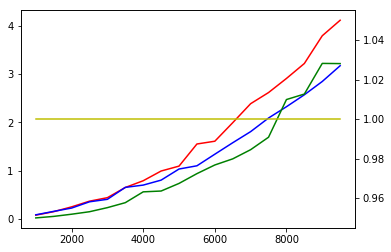

In [64]:
x = [i for i in range(1000, 10000, 500)]

def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

epsilons = [0.5, 2, 5]
trees = [4, 16]
leaves = [5, 128]

def get_data(eps, tree, leaf, filename, lines, r):
    data_mean = []
    index = []
    with open(filename, 'r') as f:
        for i in range(lines):
            content = f.readline()
            content = content.split(' ')
           # print(content)
            e = float(content[0])
            t = int(content[1])
            l = int(content[2])
            if e == eps and t == tree and l == leaf:
                num = []
                for j in range(r):
                    #print(content[5+j])
                    num.append(float(content[5 + j]))
                data_mean.append(mean(num))
                index.append(i)
    return data_mean, index

def get_data_ward(index, filename, lines, r):
    perf_mean = []
    acc_mean = []
    index_set = set(index)
    with open(filename, 'r') as f:
        for i in range(lines):
            content = f.readline()
            content = content.split(' ')
            num = []
            acc = []
            #print(content)
            if i in index_set:
                for j in range(0, r, 2):
                    num.append(float(content[j]))
                    acc.append(float(content[j + 1]))
                perf_mean.append(mean(num))
                acc_mean.append(mean(acc))
    return perf_mean, acc_mean
      
filename0 = 'perf1.txt'
filename1 = 'ward_accuracy1.txt'
y, index_1 = get_data(0.5, 4, 5, filename0, 216, 10)
z, index_2 = get_data(2, 4, 5, filename0, 216, 10)
#a, index_3 = get_data(2, 4, 5)

s, ss = get_data_ward(index_2, filename1, 216, 10)
    
plt.plot(x, y, 'r-', x, z, 'b-', x, s, 'g-')

plt1 = plt.twinx()
plt1.plot(x, ss, 'y-' )



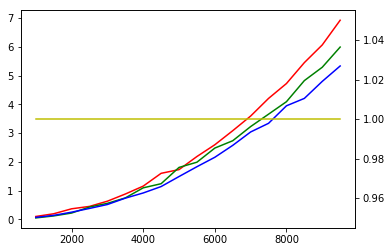

In [33]:
filename0 = 'perf.txt'
filename1 = 'ward_accuracy.txt'
filename2 = 'perf2.txt'
y, index_1 = get_data(5, 4, 8, filename0, 18, 10)
z, index_2 = get_data(9, 4, 1, filename2, 18, 10)
#a, index_3 = get_data(2, 4, 5)

s, ss = get_data_ward(index_1, filename1, 18)
    
plt.plot(x, y, 'r-', x, s, 'g-', x, z, 'b-')

plt1 = plt.twinx()
plt1.plot(x, ss, 'y-' )



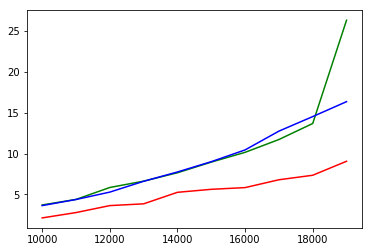

In [69]:
X = [i for i in range(10000, 20000, 1000)]
filename0 = 'perf5.txt'
filename1 = 'ward_accuracy4.txt'
filename2 = 'ward_accuracy4_1.txt'
y, index_1 = get_data(8, 5, 1, filename0, 10, 1)
#z, index_2 = get_data(8, 5, 1, filename2, 18)
#a, index_3 = get_data(2, 4, 5)

s, ss = get_data_ward(index_1, filename1, 10, 1)
w, ww = get_data_ward(index_1, filename2, 10, 1)

plt.plot(X, y, 'r-', X, s, 'g-', X, w, 'b-')

# plt1 = plt.twinx()
# plt1.plot(X, ww, 'y-' )

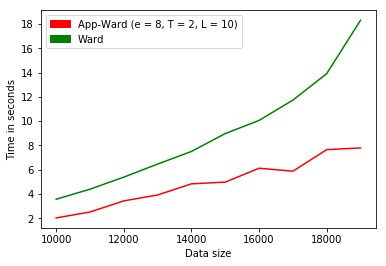

In [118]:
X = [i for i in range(10000, 20000, 1000)]
filename0 = 'perfs6.txt'
filename1 = 'ward_accuracy6.txt'
#filename2 = 'ward_accuracy4_1.txt'
y, index_1 = get_data(8, 2, 10, filename0, 10, 1)
#z, index_2 = get_data(8, 5, 1, filename2, 18)
#a, index_3 = get_data(2, 4, 5)

red_patch = mpatches.Patch(color='red', label='App-Ward (e = 8, T = 2, L = 10)')
green_patch = mpatches.Patch(color='green', label='Ward')
plt.legend(handles=[red_patch, green_patch])

s, ss = get_data_ward(index_1, filename1, 10, 1)
#w, ww = get_data_ward(index_1, filename2, 10, 1)

plt.xlabel('Data size')
plt.ylabel('Time in seconds')

plt.plot(X, y, 'r-', X, s, 'g-')

#plt1 = plt.twinx()
#plt1.plot(X, ss, 'y-' )

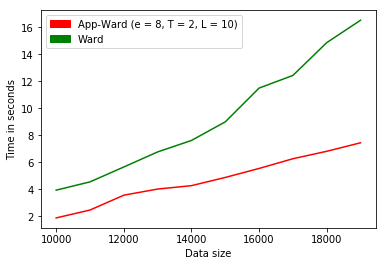

In [117]:
X = [i for i in range(10000, 20000, 1000)]
filename0 = 'perfs7.txt'
filename1 = 'ward_accuracy7.txt'
#filename2 = 'ward_accuracy4_1.txt'
red_patch = mpatches.Patch(color='red', label='App-Ward (e = 8, T = 2, L = 10)')
green_patch = mpatches.Patch(color='green', label='Ward')
plt.legend(handles=[red_patch, green_patch])

y, index_1 = get_data(8, 2, 10, filename0, 10, 1)
#z, index_2 = get_data(8, 5, 1, filename2, 18)
#a, index_3 = get_data(2, 4, 5)

s, ss = get_data_ward(index_1, filename1, 10, 1)
#w, ww = get_data_ward(index_1, filename2, 10, 1)

plt.xlabel('Data size')
plt.ylabel('Time in seconds')

plt.plot(X, y, 'r-', X, s, 'g-')